# Исследовательский анализ данных Яндекс.Афиши с 1 июня по 30 октября 2024 года 

- Автор: Коновалова Александра Евгеньевна 
- Дата: 16.06.25-18.06.25

# Цели и задачи проекта
Цель проекта: выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

Задачи проекта:

1. Загрузка и знакомство с данными 

2. Предобработка данных и подготовка их к исследованию

3. Исследовательский анализ данных

4. Статистический анализ данных

5. Выводы 

# Описание данных

**Датасет final_tickets_orders_df.csv** включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных: 

order_id — уникальный идентификатор заказа.

user_id — уникальный идентификатор пользователя.

created_dt_msk — дата создания заказа (московское время).

created_ts_msk — дата и время создания заказа (московское время).

event_id — идентификатор мероприятия из таблицы events.

cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.

age_limit — возрастное ограничение мероприятия.

currency_code — валюта оплаты, например rub для российских рублей.

device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.

revenue — выручка от заказа.

service_name — название билетного оператора.

tickets_count — количество купленных билетов.

total — общая сумма заказа.

days_since_prev с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

**Второй датасет final_tickets_events_df** содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия(без фильмов). Датасет содержит такие поля:

event_id — уникальный идентификатор мероприятия.

event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.

event_type_description — описание типа мероприятия.

event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.

organizers — организаторы мероприятия.

region_name — название региона.

city_name — название города.

venue_id — уникальный идентификатор площадки.

venue_name — название площадки.

venue_address — адрес площадки.

**Датасет final_tickets_tenge_df.csv** содержит информацию о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:

nominal — номинал (100 тенге).

data — дата.

curs — курс тенге к рублю.

cdx — обозначение валюты (kzt).

# Содержание проекта

1. Загрузка данных и знакомство с данными
2. Предообработка данных
3. Исследовательский анализ данных:
- Анализ распределения заказов по сегментам и их сезонные изменения
- Осенняя активность пользователей
- Популярные события и партнёры
4. Статистический анализ данных
- Гипотеза 1
- Гипотеза 2
5. Выводы и рекомендации 

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu 
import numpy as np

## Знакомство с данными

In [2]:
# Загружаем датасеты и выводим основную информацию о них
final_tickets_order = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')

In [3]:
final_tickets_order.info()
final_tickets_order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


В даннных датасета final_tickets_order не обнаружено пропусков, кроме столбца days_since_prev, что объяснимо спецификой столбца (если не было покупки - пропуск). Также в целом корректны типы данных, однако столбцы содержащие дату и время created_dt_msk и created_ts_msk стоит привести к типу данных datetime. 

In [4]:
final_tickets_events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')

In [5]:
final_tickets_events_df.info()
final_tickets_events_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


В даннных датасета final_tickets_events_df не обнаружено пропусков. Также корректны типы данных

In [6]:
final_tickets_tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [7]:
final_tickets_tenge_df.info()
final_tickets_tenge_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


В даннных датасета final_tickets_tenge_df не обнаружено пропусков. Также в целом корректны типы данных, однако столбец содержащие дату и время data стоит привести к типу данных datetime. 

## Предобработка данных

In [8]:
# Мы познакомились с данными, теперь проведем предобработку данных, но для начала объеденим данные в один датафрейм 
df = final_tickets_order.merge(final_tickets_events_df, on = 'event_id', how = 'left')
df = df.merge(final_tickets_tenge_df, left_on = 'created_dt_msk', right_on = 'data', how = 'left')
df.info()
pd.set_option('display.max_columns', 500)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


In [9]:
# Присоеденение столбцов прошло успешно, теперь выявим аномальные значения в категориальных столбцах. 
df['cinema_circuit'].unique()
# В столбце не обнаружено ошибок в категориях

array(['нет', 'Другое', 'Киномакс', 'КиноСити', 'Москино', 'ЦентрФильм'],
      dtype=object)

In [10]:
df['age_limit'].unique()
# В столбце не обнаружено ошибок в категориях

array([16,  0, 18, 12,  6])

In [11]:
df['currency_code'].unique()
# В столбце не обнаружено ошибок в категориях

array(['rub', 'kzt'], dtype=object)

In [12]:
df['device_type_canonical'].unique()
# В столбце не обнаружено ошибок в категориях

array(['mobile', 'desktop'], dtype=object)

In [13]:
display(df['event_type_main'].unique())
# В столбце не обнаружено ошибок в категориях, но обнаружено значение с nan
# Проверим часто ли встречаются такие пропуски 
display(df['event_type_main'].isna().sum())
# Обнаружено 238 пропусков в столбце event_type_main. 

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт', nan,
       'ёлки'], dtype=object)

238

In [14]:
display(df['region_name'].unique())
# В столбце не обнаружено ошибок в категориях, но обнаружено значение с nan
# Проверим часто ли встречаются такие пропуски 
display(df['region_name'].isna().sum())
# Обнаружено 238 пропусков в столбце region_name

array(['Каменевский регион', 'Североярская область', 'Озернинский край',
       'Лугоградская область', 'Поленовский край', 'Широковская область',
       'Медовская область', 'Златопольский округ', 'Малиновоярский округ',
       'Яблоневская область', 'Ветренский регион', 'Боровлянский край',
       'Крутоводская область', 'Ягодиновская область',
       'Серебряноярский округ', nan, 'Лесодальний край',
       'Верхоречная область', 'Горицветская область',
       'Речиновская область', 'Травиницкий округ', 'Сосновская область',
       'Серебринская область', 'Травяная область', 'Каменноярский край',
       'Солнечноземская область', 'Светополянский округ',
       'Заречная область', 'Ручейковский край', 'Глиногорская область',
       'Тепляковская область', 'Каменноозёрный край',
       'Солнечнореченская область', 'Зоринский регион',
       'Берёзовская область', 'Лесостепной край', 'Малиновая область',
       'Синегорский регион', 'Луговая область', 'Шанырский регион',
       'Каменоп

238

In [15]:
display(df['city_name'].unique())
# В столбце не обнаружено ошибок в категориях, но обнаружено значение с nan
# Проверим часто ли встречаются такие пропуски 
display(df['city_name'].isna().sum())
# Обнаружено 238 пропусков в столбце city_name

array(['Глиногорск', 'Озёрск', 'Родниковецк', 'Кристалевск',
       'Дальнозолотск', 'Радужнополье', 'Радужсвет', 'Кумсай',
       'Верховино', 'Светополье', 'Кокжар', 'Каменский', 'Лесоярич',
       'Никольянов', 'Речинцево', 'Лесозолотск', nan, 'Дальнозерск',
       'Серебрянка', 'Островецк', 'Родниковец', 'Дальнесветск',
       'Луговаярово', 'Ягодиновка', 'Дальнополин', 'Солчелуг', 'Озёрчане',
       'Серебровино', 'Лесоярово', 'Глинополье', 'Глиноград',
       'Дальнесветин', 'Северополье', 'Теплоозеро', 'Горнодолинск',
       'Ордакент', 'Озёрово', 'Луговинск', 'Лугоград', 'Златопольск',
       'Крутовинск', 'Сарыжар', 'Сосновечин', 'Тихоярск', 'Яблонецк',
       'Жаркентай', 'Широковка', 'Синеводов', 'Синеводск', 'Тихосветск',
       'Радужанов', 'Глиногорь', 'Каменосветск', 'Родниковск',
       'Травогород', 'Глинянск', 'Радужинск', 'Поляногорье',
       'Дальнолесье', 'Ручейник', 'Ключеград', 'Ключеводск', 'Поленовино',
       'Речичанск', 'Ключевополье', 'Шаныртау', 'Дальнесо

238

In [16]:
# Мы видим, что в данных присутствует 238 строк с пропусками в типах мероприятия, регионе и городе
# Принято решение удалить строки с пропусками 
df = df.dropna(subset=['event_type_main', 'region_name', 'city_name'])
display(df['event_type_main'].isna().sum())
display(df['region_name'].isna().sum())
display(df['city_name'].isna().sum())

0

0

0

Были проверены и обработаны категориальные столбцы. Теперь проверим количественные столбцы на выбросы

In [17]:
# Проверяем выбросы в столбце revenue в разрезе разных валют 
df[df['currency_code'] == 'rub']['revenue'].describe()

count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

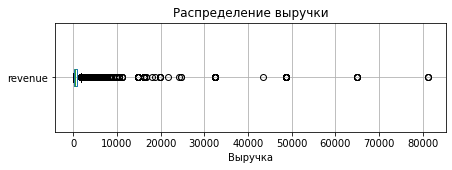

In [18]:
# Строим ящик с усами, чтобы визуализировать выбросы в данных
plt.figure(figsize=(7, 2))
df.loc[df['currency_code'] == 'rub'].boxplot(column='revenue', vert=False)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.show()

В столбце revenue в разрезе рублей обнаружены выбросы, отфильтруем данные по 99 процентилю

In [19]:
# Определяем 99 процентиль для рублей 
rub_quantile = df[df['currency_code'] == 'rub']['revenue'].quantile(0.99)
display(rub_quantile)

2570.8

In [20]:
# Фильтруем датасет 
df = df[(df['currency_code'] != 'rub') | (df['revenue'] <= rub_quantile)]

In [21]:
# Сделаем тоже самое для выручки в тенге
df[df['currency_code'] == 'kzt']['revenue'].describe()

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

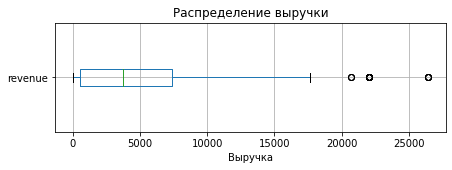

In [22]:
# Строим ящик с усами, чтобы визуализировать выбросы в данных
plt.figure(figsize=(7, 2))
df.loc[df['currency_code'] == 'kzt'].boxplot(column='revenue', vert=False)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.show()

В столбце revenue в разрезе рублей обнаружены выбросы, отфильтруем данные по 99 процентилю

In [23]:
# Определяем 99 процентиль для рублей 
kzt_quantile = df[df['currency_code'] == 'kzt']['revenue'].quantile(0.99)
display(kzt_quantile)

17617.24

In [24]:
# Фильтруем датасет 
df = df[(df['currency_code'] != 'kzt') | (df['revenue'] <= kzt_quantile)]

Проверим есть ли выбросы в столбце tickets_count	

In [25]:
df['tickets_count'].describe()

count    287782.000000
mean          2.740217
std           1.162477
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

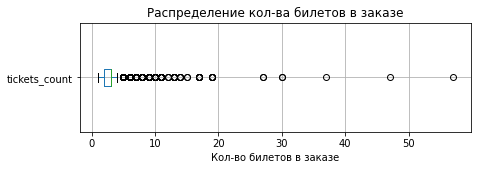

In [26]:
# В столбце обнаружены выбросы
# Строим ящик с усами, чтобы визуализировать выбросы в данных
plt.figure(figsize=(7, 2))
df.boxplot(column='tickets_count', vert=False)
plt.title('Распределение кол-ва билетов в заказе')
plt.xlabel('Кол-во билетов в заказе')
plt.show()

В столбце tickets_count обнаружены выбросы, отфильтруем данные по 99 процентилю

In [27]:
# Определяем 99
ticket_quantile = df['tickets_count'].quantile(0.99)
display(ticket_quantile)

6.0

In [28]:
# Фильтруем датасет 
df = df[df['tickets_count'] <= ticket_quantile]

In [29]:
#Посмотрим на датасет после этих манипуляций 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287602 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287602 non-null  int64  
 1   user_id                 287602 non-null  object 
 2   created_dt_msk          287602 non-null  object 
 3   created_ts_msk          287602 non-null  object 
 4   event_id                287602 non-null  int64  
 5   cinema_circuit          287602 non-null  object 
 6   age_limit               287602 non-null  int64  
 7   currency_code           287602 non-null  object 
 8   device_type_canonical   287602 non-null  object 
 9   revenue                 287602 non-null  float64
 10  service_name            287602 non-null  object 
 11  tickets_count           287602 non-null  int64  
 12  total                   287602 non-null  float64
 13  days_since_prev         265901 non-null  float64
 14  event_name          

Теперь проверим данные на явные и неявные дубликаты 

In [30]:
# Проверяем данные на явные дубликаты
df.duplicated().sum()

0

Явных дубликатов в данных не обнаруженно 

In [31]:
# Проверяем данные на неявные дубликаты в столбце order_id
display(df.duplicated(subset = 'order_id').sum())
display(df.duplicated(subset = 
('user_id', 'event_id', 'created_ts_msk', 'cinema_circuit', 'age_limit','currency_code',
'tickets_count', 'revenue', 'service_name', 'device_type_canonical', 'event_name', 'organizers','city_id')).sum())

0

39

В данных обнаружено 39 неявных дубликатов. Удалим их 

In [32]:
df = df.drop_duplicates(subset = ('user_id', 'event_id', 'created_ts_msk', 'cinema_circuit', 'age_limit','currency_code','tickets_count', 'revenue', 'service_name', 'device_type_canonical', 'event_name', 'organizers','city_id'))

Данные были очищены от неявных дубликатов, было удалено 39 строк, явных дубликатов в данных не было обнаружено. Теперь приведем столбцы с датой и временем к типу данных datetime, но перед этим удалим дублирующий столбец с датой data

In [33]:
# Удаляем столбец дублирующий дату data
df = df.drop(columns=['data'])

Меняем типы данных в столбцах created_dt_msk и created_ts_msk c object на datetime 

In [34]:
df['created_dt_msk'] = pd.to_datetime(df['created_dt_msk'])
df['created_ts_msk'] = pd.to_datetime(df['created_ts_msk'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287563 entries, 0 to 290848
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287563 non-null  int64         
 1   user_id                 287563 non-null  object        
 2   created_dt_msk          287563 non-null  datetime64[ns]
 3   created_ts_msk          287563 non-null  datetime64[ns]
 4   event_id                287563 non-null  int64         
 5   cinema_circuit          287563 non-null  object        
 6   age_limit               287563 non-null  int64         
 7   currency_code           287563 non-null  object        
 8   device_type_canonical   287563 non-null  object        
 9   revenue                 287563 non-null  float64       
 10  service_name            287563 non-null  object        
 11  tickets_count           287563 non-null  int64         
 12  total                   287563

In [35]:
# Создаем столбец 'revenue_rub', где вся выручка будет представлена в рублях, то есть переводим тенге в рубли, 
#а рубли оставляем 
df['revenue_rub'] = np.where(
    df['currency_code'] == 'kzt',
    df['revenue'] / 100 * df['curs'],
    df['revenue']
)

In [36]:
# Создаем столбец 'one_ticket_revenue_rub', где представлена выручка с одного билета на мероприятие 
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']

In [37]:
# Создаем столбец 'month', где содержится номер месяца, когда была совершена покупка 
df['month'] = df['created_dt_msk'].dt.month

In [38]:
# Создаем столбец 'season', где содержится сезон (зима, весна, лето, осень) совершения покупки
def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

df['season'] = df['month'].apply(get_season)

In [39]:
# Проверим как выглядит датасет после всех изменений 
df.info()
pd.set_option('display.max_columns', 500)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287563 entries, 0 to 290848
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287563 non-null  int64         
 1   user_id                 287563 non-null  object        
 2   created_dt_msk          287563 non-null  datetime64[ns]
 3   created_ts_msk          287563 non-null  datetime64[ns]
 4   event_id                287563 non-null  int64         
 5   cinema_circuit          287563 non-null  object        
 6   age_limit               287563 non-null  int64         
 7   currency_code           287563 non-null  object        
 8   device_type_canonical   287563 non-null  object        
 9   revenue                 287563 non-null  float64       
 10  service_name            287563 non-null  object        
 11  tickets_count           287563 non-null  int64         
 12  total                   287563

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.6972,kzt,1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",100,18.3419,kzt,289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",100,19.6475,kzt,1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",100,18.5010,kzt,8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",100,19.6648,kzt,1390.41,463.4700,10,осень


**Основные выводы после предообработки данных**:

- В начале все датасеты были объедененны в один - df для упрощения дальнейшей работы 
- В данных было обнаружено 238 значений с nan в совновных категориальных столбцах, строки с nan были удалены 
- Данные были проверены на выбросы в столбцах revenue в разерезе валют и tickets_count. Были обнаружены выбросы, данные в этих столбцах были отфильтрованы по 99 процентилю 
- В столбцах не были обнаружены явные дубликаты, но было обнаружено 39 неявных дубликатов, данные были от них очищены
- Из данных был удален столбец data дублирующий дату
- В столбцах created_dt_msk и created_ts_msk тип данных был преобразован c object на datetime. В оснальных столбцах не было обнаружено проблем с типом данных 
- Был создан столбец 'revenue_rub', где вся выручка представлена в рублях, тенге были переведены в рубли, а рубли остались неизменными
- Был создан столбец 'one_ticket_revenue_rub', содержащий выручку с одного билета на мероприятие
- Был создан столбец 'month', сожержащий номер месяца, совершения покупки 
- Был создан столбец 'season', содержащий сезон (зима, весна, лето, осень) совершения покупки
- Количество строк после всех преобразований сократилось с 290849 до 287563. То есть было удалено 3286 строк, что составляет примерно 1% данных.

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

Датасет был предобработан, теперь перейдем к исследовательской части работы, для начала проанализируем распределения заказов по сегментам и их сезонные изменения

In [40]:
# Найдем для каждого месяца количество заказов
order_month = df.groupby('month')['order_id'].count()
display (order_month)

month
6     34147
7     40376
8     44514
9     69310
10    99216
Name: order_id, dtype: int64

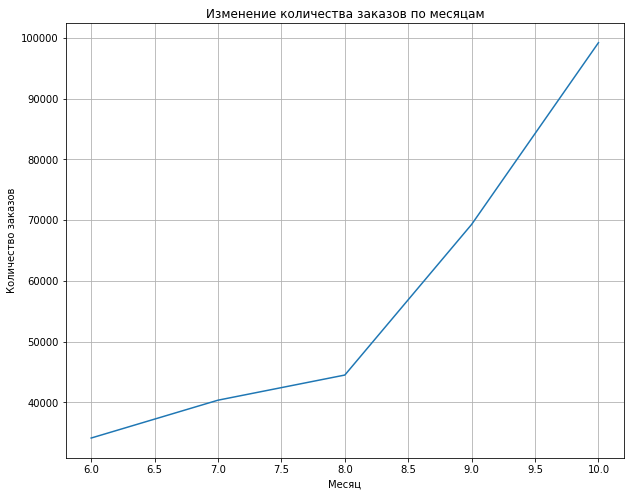

In [41]:
# Визуализируем полученный данные 
plt.figure(figsize=(10, 8))
order_month.plot(kind='line',legend=False)
plt.title('Изменение количества заказов по месяцам')
plt.ylabel('Количество заказов')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Как мы видим есть тенденция на увелечение кол-ва заказов к осени.

Теперь для осеннего и летнего периодов сравним распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу.

In [42]:
# Для начала рассчитаем доля заказов по мероприятиям в зависимости от сезона
order_event = df.groupby(['season','event_type_main'])['order_id'].count()/df['order_id'].count()
order_event = order_event.unstack(level=0).fillna(0)
display (order_event)

season,лето,осень
event_type_main,,
выставки,0.008402,0.008471
другое,0.112323,0.115296
концерты,0.176525,0.218133
спорт,0.010446,0.065620
стендап,0.022068,0.024075
театр,0.083237,0.148580
ёлки,0.000949,0.005873


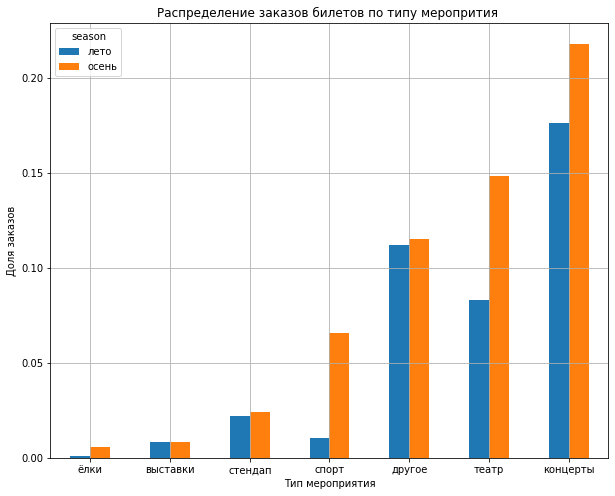

In [43]:
# Визуализурием данные 
order_event.sort_values(by = 'осень').plot(kind='bar',legend=True, figsize=(10, 8))
plt.title('Распределение заказов билетов по типу меропрития ')
plt.ylabel('Доля заказов')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Практически по всем типам мероприятий в осенний период доля заказов значительно больше, кроме категории "выставки", доля этих мероприятий примерно одинакова и осенью, и летом. Самые популярные мероприятия для обоих сезонов: концерты, театр, другое

Теперь для осеннего и летнего периодов сравним распределение заказов билетов по типам устройств 

In [44]:
# Посчитаем долю заказов по типам устройств в зависимости от сезона
order_device = df.groupby(['season','device_type_canonical'])['order_id'].count()/df['order_id'].count()
order_device = order_device.unstack(level=0).fillna(0)
display(order_device)

season,лето,осень
device_type_canonical,,
desktop,0.080083,0.119125
mobile,0.333868,0.466924


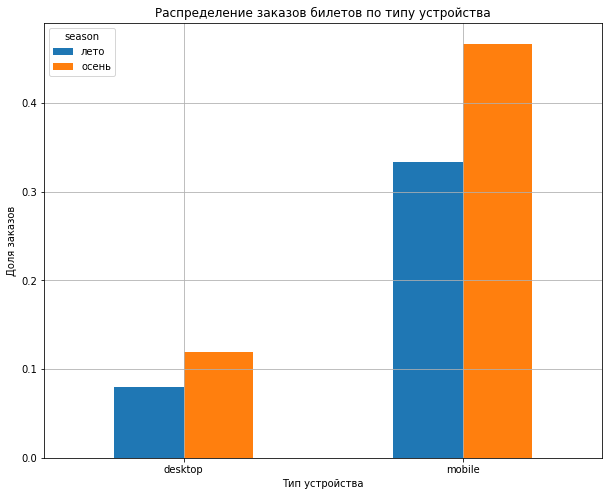

In [45]:
# Визуализурием данные 
order_device.sort_values(by = 'осень').plot(kind='bar',legend=True, figsize=(10, 8))
plt.title('Распределение заказов билетов по типу устройства')
plt.ylabel('Доля заказов')
plt.xlabel('Тип устройства')
plt.xticks(rotation=0)
plt.grid()
plt.show()

С устройствами мы наблюдаем ту же картину - в осенний период кол-во заказов увеличивается. При этом заказов с смартофонов совершается подавляющее кол-во для обоих сезонов

Теперь для осеннего и летнего периодов сравним распределение заказов билетов по возврастному рейтингу 

In [46]:
# Посчитаем долю заказов по типам устройств в зависимости от сезона
order_age = df.groupby(['season','age_limit'])['order_id'].count()/df['order_id'].count()
order_age = order_age.unstack(level=0).fillna(0)
display(order_age)

season,лето,осень
age_limit,,
0,0.074359,0.138425
6,0.075368,0.103271
12,0.085070,0.129540
16,0.117352,0.153754
18,0.061802,0.061058


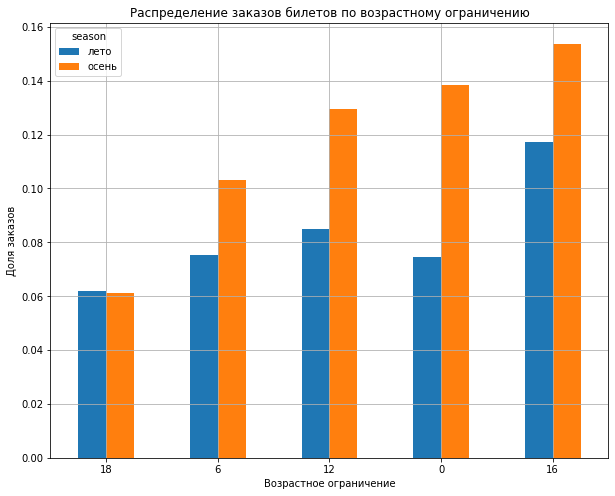

In [47]:
# Визуализурием данные 
order_age.sort_values(by = 'осень').plot(kind='bar',legend=True, figsize=(10, 8))
plt.title('Распределение заказов билетов по возрастному ограничению')
plt.ylabel('Доля заказов')
plt.xlabel('Возрастное ограничение')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Та же тенденция, сохраняется для возрастных ограничений. Стоит обратить внимание, что для мероприятий 18+ доля заказов примерно одинакова и в летнее и осеннее время, при этом это самая непопулярная категория. Наиболее популярными возрастными категориями являются 16+, 0+ и 12+

Теперь проанализируем изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью

In [48]:
# Посчитаем выручку с продажи одного билета в зависимости от типа мероприятия летом и осенью
ticket_event = df.groupby(['season','event_type_main'])['one_ticket_revenue_rub'].mean()
ticket_event = ticket_event.unstack(level=0).fillna(0)
display (ticket_event)

season,лето,осень
event_type_main,,
выставки,86.416198,90.603610
другое,77.395258,76.059694
концерты,304.800056,268.379925
спорт,50.744650,49.986591
стендап,218.518107,231.124973
театр,214.179496,175.991603
ёлки,271.436176,229.564210


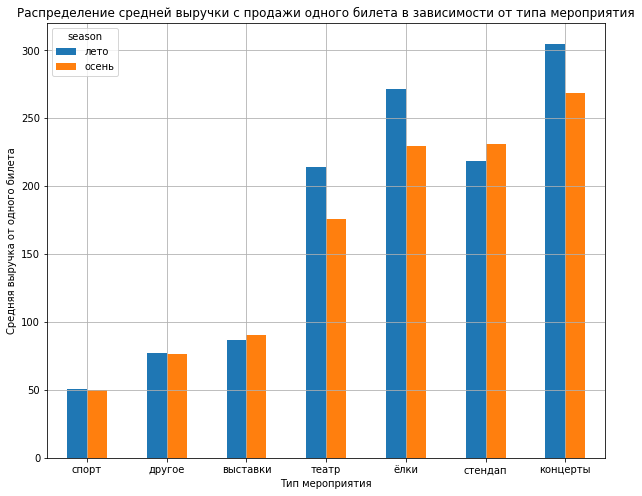

In [49]:
# Визуализируем полученные результаты 
ticket_event.sort_values(by = 'осень').plot(kind='bar',legend=True, figsize=(10, 8))
plt.title('Распределение средней выручки с продажи одного билета в зависимости от типа мероприятия')
plt.ylabel('Средняя выручка от одного билета')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [50]:
# Рассчитаем относительное изменение осенних значений по сравнению с летними
ticket_event['change'] = ((ticket_event['осень'] - ticket_event['лето'])/ticket_event['лето'])*100
display(ticket_event)

season,лето,осень,change
event_type_main,,,
выставки,86.416198,90.603610,4.845634
другое,77.395258,76.059694,-1.725640
концерты,304.800056,268.379925,-11.948860
спорт,50.744650,49.986591,-1.493869
стендап,218.518107,231.124973,5.769255
театр,214.179496,175.991603,-17.829854
ёлки,271.436176,229.564210,-15.426081


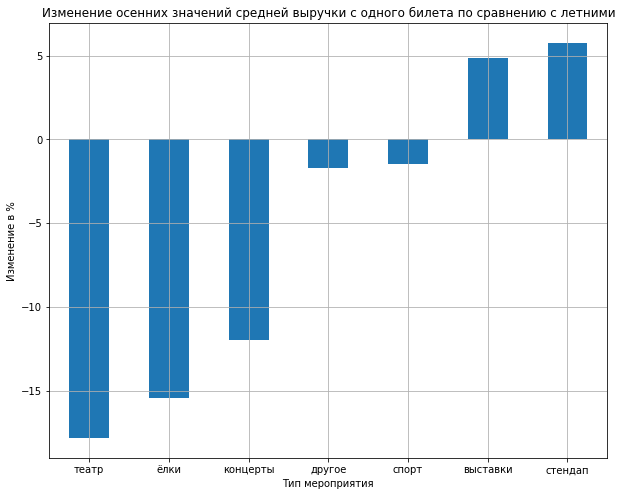

In [51]:
# Визуализируем полученные результаты 
ticket_event['change'].sort_values().plot(kind='bar',legend=False, figsize=(10, 8))
plt.title('Изменение осенних значений средней выручки с одного билета по сравнению с летними')
plt.ylabel('Изменение в %')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Выводы:**
- Обнаружена явная тенденция на увелечение кол-ва заказов к осени
- Практически по всем типам мероприятий в осенний период доля заказов значительно больше, кроме категории "выставки", доля этих мероприятий примерно одинакова и осенью, и летом. Самые популярные мероприятия для обоих сезонов: концерты, театр, другое
- С устройствами мы наблюдаем ту же картину - в осенний период кол-во заказов увеличивается. При этом заказов с смартофонов совершается подавляющее кол-во для обоих сезонов
- Та же тенденция, сохраняется для возрастных ограничений. Стоит обратить внимание, что для мероприятий 18+ доля заказов примерно одинакова и в летнее и осеннее время, при этом это самая непопулярная категория. Наиболее популярными возрастными категориями являются 16+, 0+ и 12+
- Однако средний чек с одного билета летом выше, чем осенью для всех типов мероприятий, кроме выставок и стендапов. Средняя цена за билет в театр осенью ниже на 18 %, на елки на 15%, на концерты на 12%, на другое и спорт примерно на 1-2%. Большинство изменений можно объяснить сезонностью мероприятий: летом закрывается театральный сезон, елки также не очень популярны, как и другие типы мероприятий, люди уезжают в отпуска или предпочитают проводить время на открытом воздухе, поэтому кассу делают засчет увелечения цены билетов

### Осенняя активность пользователей

In [52]:
# Отфильтруем данные только за осенние месяцы 
df_autumn = df[df['season']=='осень'].copy()

Создадим свободную таблицу, где рассчитаем общее число заказов, количество активных пользователей, среднее число заказов на одного пользователя, среднюю стоимость одного билета по дням 

In [53]:
# Создаем сводную таблицу 
pivot = pd.pivot_table(
    df_autumn,
    index='created_dt_msk',
    values=['order_id', 'user_id', 'tickets_count','one_ticket_revenue_rub'],
    aggfunc={
        'order_id': 'count',              
        'user_id': 'nunique',
        'one_ticket_revenue_rub': 'mean'  
    }
)
display(pivot)

,one_ticket_revenue_rub,order_id,user_id
created_dt_msk,,,
2024-09-01,200.168708,1327,564
2024-09-02,189.464639,1380,574
2024-09-03,80.350151,5113,778
2024-09-04,178.077235,1772,685
2024-09-05,189.763046,1940,739
...,...,...,...
2024-10-27,186.968328,2849,1034
2024-10-28,170.600648,2836,985
2024-10-29,177.430604,2833,998


In [54]:
# Переименуем столбцы для лучшего пониманния 
pivot.columns = ['Средняя стоимость одного билета', 'Общее число заказов', 'DAU']
# Добавим столбец с средним числом заказов на одного пользователя
pivot['Среднее число заказов на одного пользователя'] = pivot['Общее число заказов']/pivot['DAU']
display (pivot)

,Средняя стоимость одного билета,Общее число заказов,DAU,Среднее число заказов на одного пользователя
created_dt_msk,,,,
2024-09-01,200.168708,1327,564,2.352837
2024-09-02,189.464639,1380,574,2.404181
2024-09-03,80.350151,5113,778,6.571979
2024-09-04,178.077235,1772,685,2.586861
2024-09-05,189.763046,1940,739,2.625169
...,...,...,...,...
2024-10-27,186.968328,2849,1034,2.755319
2024-10-28,170.600648,2836,985,2.879188
2024-10-29,177.430604,2833,998,2.838677


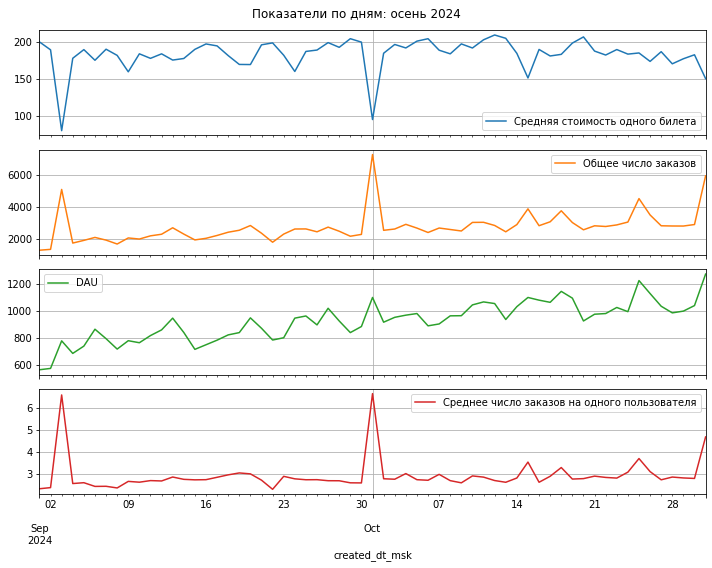

In [55]:
# Визуализируем сводную таблицу 
pivot.plot(
    subplots=True,
    figsize=(10, 8),
    title='Показатели по дням: осень 2024',
    grid=True
)
plt.tight_layout()
plt.show()

Мы видим, что средняя стоимость одного билета, общее число заказов и DAU в целом стабильны и стабильно растут, пиковые значения наблюдаются в начале сентября, начале октября и мы наблюдаем резкий рост в конце октября. Это может быть связано с праздничными днями (1 сентября и последующая неделя, когда отмечают начало учебного года, 31 октября - хэллоуин, и конец октября - это начало школьных каникул). В то же время средняя стоимость одного билета в целом стабильна, но наблюдаются пиковые снижения стоимости, которые соотносятся с пиковыми значениями других показателей. То есть средняя цена за билет на мероприятия падает, а спрос растет 

Теперь рассмотрим динамику показателей в разрезе дней недели

In [56]:
# Создаем столбец с названием дня недели 
df_autumn['weekday'] = df_autumn['created_dt_msk'].dt.weekday

In [57]:
# Создаем сводную таблицу 
pivot_weekday = pd.pivot_table(
    df_autumn,
    index='weekday',
    values=['order_id', 'user_id', 'tickets_count','one_ticket_revenue_rub'],
    aggfunc={
        'order_id': 'count',              
        'user_id': 'nunique',
        'one_ticket_revenue_rub': 'mean'  
    }
)
display(pivot_weekday)

,one_ticket_revenue_rub,order_id,user_id
weekday,,,
0,184.250510,21500,4444
1,140.664396,31477,4794
2,186.009103,22871,4813
3,177.991547,27150,4969
4,185.809707,24811,4869
5,192.330664,21332,4572
6,198.035968,19385,4393


In [58]:
# Переименуем столбцы для лучшего пониманния 
pivot_weekday.columns = ['Средняя стоимость одного билета', 'Общее число заказов', 'DAU']
# Добавим столбец с средним числом заказов на одного пользователя
pivot_weekday['Среднее число заказов на одного пользователя'] = pivot_weekday['Общее число заказов']/pivot_weekday['DAU']
display (pivot_weekday)

,Средняя стоимость одного билета,Общее число заказов,DAU,Среднее число заказов на одного пользователя
weekday,,,,
0,184.250510,21500,4444,4.837984
1,140.664396,31477,4794,6.565916
2,186.009103,22871,4813,4.751922
3,177.991547,27150,4969,5.463876
4,185.809707,24811,4869,5.095708
5,192.330664,21332,4572,4.665792
6,198.035968,19385,4393,4.412702


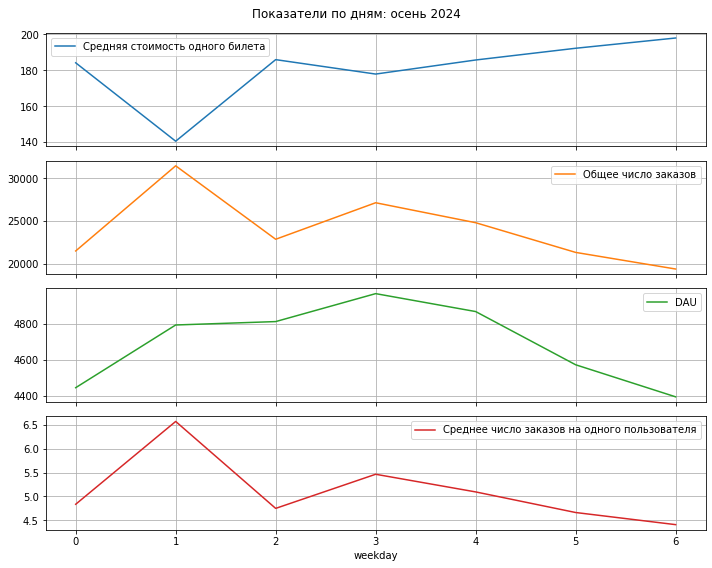

In [59]:
# Визуализируем сводную таблицу 
pivot_weekday.plot(
    subplots=True,
    figsize=(10, 8),
    title='Показатели по дням: осень 2024',
    grid=True
)
plt.tight_layout()
plt.show()

В рамках дней недели мы видим тенденцию на снижение средней стоимости одного билета, общего числа заказов и DAU к выходным, при этом средняя стоимость одного билета наоборот к выходным растет. Больше всего заказов приходится на вторник. Четверг - самое активное время среди уникальных пользователей 

**Выводы:**

Динамика по дням (сентябрь–октябрь):
- Пики заказов и DAU приходятся на начало сентября — возможно, из-за мероприятий ко Дню знаний;
- Пики заказов и DAU приходятся также на начало октября — возможно из-за активизация осеннего культурного сезона;
- Пики заказов и DAU приходятся также на конец октября — возможно из-за Хэллоуина и школьных каникул.
- Средняя стоимость билета в пиковые периоды падает, что может свидетельствовать о скидках или увеличении доли дешёвых массовых мероприятий.

Динамика по дням недели (сентябрь-октябрь):
- Максимум заказов — по вторникам.
- Наибольшая активность (DAU) — по четвергам, вероятно, пользователи планируют выходные заранее.
- Средняя стоимость билета постепенно растёт к выходным


### Популярные события и партнёры

Теперь для каждого региона посчитаем уникальное количество мероприятий и общее число заказов осенью. 

In [60]:
# Создаем таблицу по регионам, где поссчитаем кол-во заказов и кол-во мероприятий
top_region = df_autumn.groupby('region_name')[['event_id','order_id']].agg({
    'event_id':'nunique','order_id':'count'}).sort_values(by=['event_id', 'order_id'], ascending = False)


In [61]:
# Переименуем столбцы
top_region.columns = ({'Кол_во мероприятий','Кол-во заказов'})
# Добавим доли заказов и мероприятий 
top_region['Доля мероприятий'] = top_region['Кол_во мероприятий']/top_region['Кол_во мероприятий'].sum()
top_region['Доля заказов'] = top_region['Кол-во заказов']/top_region['Кол-во заказов'].sum()

In [62]:
# Отфильтруем данные по доле заказов (>5%)
top_region = top_region[top_region['Доля заказов']>0.02]
display (top_region)

,Кол-во заказов,Кол_во мероприятий,Доля мероприятий,Доля заказов
region_name,,,,
Каменевский регион,3910,46667,0.276913,0.246377
Североярская область,2610,20655,0.122563,0.164461
Широковская область,803,8715,0.051713,0.050599
Светополянский округ,764,4777,0.028346,0.048141
Речиновская область,529,3564,0.021148,0.033333
Серебринская область,456,4467,0.026506,0.028733
Яблоневская область,432,4198,0.024910,0.027221
Тепляковская область,419,2484,0.014740,0.026402
Горицветская область,406,3229,0.019160,0.025583


Отфильтровали выгрузку по доле заказов от общего числа, чтобы убрать низкочастотные показатели в данном случае регионы, где доля заказов меньше 2 % от общего числа. Тем самым получили топ 11 регионов по доле мероприятий и заказов.

Каменевский регион и Североярская область с большим отрывом являются лидерами по кол-ву заказов и кол-ву уникальных мероприятий

Каневский регион - 25% мероприятий от общего кол-ва и 28% заказов от общего кол-ва. 

Североярская область - 16% мероприятий от общего кол-ва и 12% заказов от общего кол-ва.

Также стоит обратить внимание на Медовскую область, доля мероприятий там небольшая, однако по доле заказов эта область занимает 3 место 

Эти показатели у остальных регионов меньше 5 %

In [63]:
# Создаем таблицу по билетным операторам, где поссчитаем кол-во заказов и кол-во мероприятий
top_service = df_autumn.groupby('service_name')[['event_id','order_id','revenue_rub']].agg({
    'event_id':'nunique','order_id':'count','revenue_rub':'sum'}).sort_values(by=[
    'event_id', 'order_id', 'revenue_rub'], ascending = False)

In [64]:
# Переименуем столбцы
top_service = top_service.rename(columns= {
    'event_id':'Кол_во мероприятий','order_id':'Кол-во заказов','revenue_rub':'Выручка'})

In [65]:
# Добавим доли заказов и мероприятий 
top_service['Доля мероприятий'] = top_service['Кол_во мероприятий']/top_service['Кол_во мероприятий'].sum()
top_service['Доля заказов'] = top_service['Кол-во заказов']/top_service['Кол-во заказов'].sum()
top_service['Выручка'] = top_service['Выручка'].apply(lambda x: f"{x/1_000_000:.2f} млн ₽")

In [66]:
# Отфильтруем по доле заказов (> 2%)
top_service = top_service[top_service['Доля заказов']>0.02]

In [67]:
# Выведем результат 
display(top_service)

,Кол_во мероприятий,Кол-во заказов,Выручка,Доля мероприятий,Доля заказов
service_name,,,,,
Лови билет!,3616,25790,10.38 млн ₽,0.209114,0.153033
Билеты без проблем,2844,32340,12.11 млн ₽,0.164469,0.191899
Билеты в руки,2469,25723,7.61 млн ₽,0.142783,0.152635
Облачко,1409,15478,10.61 млн ₽,0.081483,0.091843
Лучшие билеты,1396,12425,1.67 млн ₽,0.080731,0.073727
Мой билет,1002,19395,10.83 млн ₽,0.057946,0.115086
Тебе билет!,859,3760,2.17 млн ₽,0.049676,0.022311
Прачечная,728,5798,2.55 млн ₽,0.042100,0.034404
Весь в билетах,599,9415,9.35 млн ₽,0.034640,0.055867


Отфильтровали выгрузку по доле заказов от общего числа, чтобы убрать низкочастотные показатели в данном случае сервисы, где доля заказов меньше 2 % от общего числа. Тем самым получили топ 10 партнеров.

С билетными операторами не все так одназначно. К лидерам по кол_ву мероприятий и кол-ву заказов относятся следующие сервисы:

- Лови билет!(мероприятия - 21%, заказы - 15%)
- Билеты без проблем (мероприятия - 16%, заказы - 19%)
- Билеты в руки	(мероприятия - 14%, заказы - 15%)

Самое большое кол-во мероприятий относится к сервису "лови билет!", при этом количество заказов больше у сервиса "билеты без проблем", выручка у этого оперотара также больше - 12 млн, то есть их мероприятия пользуются большим спросом.
Стоит также обратить внимание на сервисы "Облачко", "Мой билет" и "Весь в билетах", доля мероприятий и заказов у них меньше (3-9%), однако выручка на равне с сервисом "Лови билет", что может говорить о высокой стоимости мероприятий, которые предоставляют эти площадки
Также присутвует большое кол-во операторов, которые приносят минимум выручки и оперируют 1-2 мероприятия

**Выводы:**
Кол-во заказов и кол-во уникальных мероприятий по регионам:
- Каменевский регион — безусловный лидер(25% всех мероприятий и 28% всех заказов)
- Североярская область — второе место(16% мероприятий и 12% заказов)
- Все остальные регионы сильно уступают — менее 5% в каждой метрике.

Кол-во закзаов, кол-во уникальных мероприятий и выручка по билетным операторам:

Топ-3 по активности:

- Лови билет! — 21% мероприятий, 15% заказов.
- Билеты без проблем — 16% мероприятий, 19% заказов и лидер по выручке (12 млн ₽).
- Билеты в руки — 14% мероприятий, 15% заказов.

Вывод: мероприятия "Билеты без проблем" вызывают наибольший спрос и интерес для дальнейшего отрудничества 

- Сервисы, на которые стоит обратить внимание: «Облачко», «Мой билет» и «Весь в билетах» — несмотря на долю показателей <9%, генерируют сравнимую выручку с лидерами. Это может говорить о высокой средней стоимости билетов.
- Присутствует множество мелких операторов — низкий вклад в выручку, работают с 1–2 мероприятиями

## Статистический анализ данных

### Гипотеза 1

Проверим гипотезу, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

H0 - среднее кол-во заказов у пользователей мобильных устройств не больше, чем у пользователей десктопных устройств 

Н1 - среднее кол-во заказов у пользователей мобильных устройств больше, чем у пользователей десктопных устройств 

In [70]:
# Разделим датасет на мобильные и десктопные утсройства 
orders_mobile = df_autumn[df_autumn['device_type_canonical']=='mobile']
orders_desktop = df_autumn[df_autumn['device_type_canonical']=='desktop']

In [69]:
# Подсчитаем среднее кол-во заказов на одного пользователя 
orders_mobile_count = orders_mobile.groupby('user_id')['order_id'].count()
orders_desktop_count = orders_desktop.groupby('user_id')['order_id'].count()

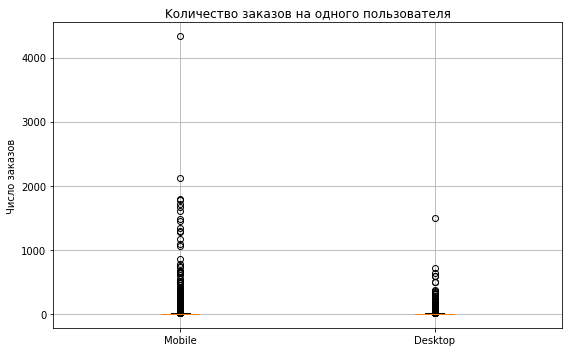

In [74]:
# Построим боксплот, чтобы посмотреть на распределение данных 
plt.figure(figsize=(8, 5))

plt.boxplot(
    [orders_mobile_count, orders_desktop_count],
    labels=['Mobile', 'Desktop'],
)

plt.title('Kоличество заказов на одного пользователя')
plt.ylabel('Число заказов')
plt.grid(True)
plt.tight_layout()
plt.show()

Распределение является ассиметричным и ненормальным, много выбросов, длиный хвост, также присутствуют резкие выбросы 

Выберем для проверки гипотезы тест Манна-Уитни, так как мы уже знаем, что распределение групп неравномерно, также выборки количественные и независимые. Уровень статистической значимости - 5%

In [75]:
test_result = mannwhitneyu(orders_mobile_count,
                          orders_desktop_count,
                          alternative = 'greater')
alpha = 0.05
if test_result.pvalue > alpha:
    print(f'pvalue={test_result.pvalue} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print(f'pvalue={test_result.pvalue} < {alpha}')
    print('Отвергаем нулевую гипотезу')

pvalue=3.7517575005947054e-07 < 0.05
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута, среднее кол-во заказов у пользователей мобильных устройств действительно больше, чем у пользователей десктопных устройств

pvalue=3.7517575005947054e-07

### Гипотеза 2

Проверим гипотезу, что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Н0 - среднее время между заказами пользователей мобильных приложений не выше по сравнению с пользователями стационарных устройств

Н1 - среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [83]:
# Для начала рассчитаем время между заказами для пользователей мобильных устройств 
mobile_times = (
    orders_mobile
    .groupby('user_id')['created_dt_msk']
    .agg(['min', 'max', 'count'])
)
# Отфильтруем данные, если у пользователя не было заказов 
mobile_times = mobile_times[mobile_times['count'] > 1]

mobile_times['avg_days_between'] = (
    (mobile_times['max'] - mobile_times['min']).dt.days / (mobile_times['count'])
)
display (mobile_times)

,min,max,count,avg_days_between
user_id,,,,
000898990054619,2024-10-04,2024-10-23,2,9.500000
000a55a418c128c,2024-09-29,2024-10-15,2,8.000000
001e7037d013f0f,2024-09-16,2024-09-29,2,6.500000
00245c702bc343e,2024-09-25,2024-10-25,2,15.000000
002ec276eee9b0b,2024-09-21,2024-10-31,11,3.636364
...,...,...,...,...
ffe364dd8211157,2024-10-07,2024-10-07,3,0.000000
ffe73c50cbd71fc,2024-09-15,2024-09-15,2,0.000000
ffed3ff067d4f12,2024-09-01,2024-10-17,3,15.333333


In [84]:
# Рассчитаем время между заказами для пользователей стаицонарных устройств 
desktop_times = (
    orders_desktop
    .groupby('user_id')['created_dt_msk']
    .agg(['min', 'max', 'count'])
)
# Отфильтруем данные, если у пользователя не было заказов 
desktop_times = desktop_times[desktop_times['count'] > 1]

desktop_times['avg_days_between'] = (
    (desktop_times['max'] - desktop_times['min']).dt.days / (desktop_times['count'])
)
display (desktop_times)

,min,max,count,avg_days_between
user_id,,,,
002b75ca606ba46,2024-10-02,2024-10-16,3,4.666667
005fefeabf1e678,2024-09-10,2024-09-10,3,0.000000
006d1660d830822,2024-09-01,2024-10-18,7,6.714286
00937de412ea430,2024-10-06,2024-10-06,3,0.000000
00cb8c1ef996876,2024-10-21,2024-10-22,2,0.500000
...,...,...,...,...
ff684621b134cc4,2024-09-19,2024-10-29,9,4.444444
ff840c2bf377690,2024-09-27,2024-10-18,2,10.500000
ff9310a90294d5c,2024-09-24,2024-10-31,13,2.846154


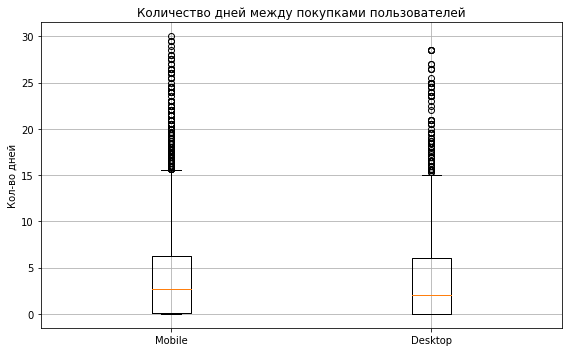

In [85]:
# Проверим выборки на равномерность распределения, построив боксплот 
plt.figure(figsize=(8, 5))

plt.boxplot(
    [mobile_times['avg_days_between'], desktop_times['avg_days_between']],
    labels=['Mobile', 'Desktop'],
)

plt.title('Количество дней между покупками пользователей')
plt.ylabel('Кол-во дней')
plt.grid(True)
plt.tight_layout()
plt.show()

Распределение является ассиметричным и ненормальным присутствуют выбросы и длиный хвост 

Выберем для проверки гипотезы тест Манна-Уитни, так как мы уже знаем, что распределение групп неравномерно, также выборки количественные и независимые. Уровень статистической значимости - 5%

In [87]:
test_result = mannwhitneyu(mobile_times['avg_days_between'],
                          desktop_times['avg_days_between'],
                          alternative = 'greater')
alpha = 0.05
if test_result.pvalue > alpha:
    print(f'pvalue={test_result.pvalue} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print(f'pvalue={test_result.pvalue} < {alpha}')
    print('Отвергаем нулевую гипотезу')

pvalue=2.4566253909444583e-10 < 0.05
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута, среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

pvalue=2.4566253909444583e-10

## Выводы 

1. Предобработка данных
- Все датасеты были объединены в один (df) для удобства анализа.
- Были удалены строки, где встречались NaN в категориальных колонках (238).
- Произведена очистка от выбросов в revenue и tickets_count по 99-му процентилю.
- Удалены неявные дубликаты (39 строк).
- Приведены типы данных в столбцах с датой и временем
- Всего очищено в данных около 1% данных
- Созданы новые столбцы: revenue_rub - выручка в единой валюте, one_ticket_revenue_rub - средняя выручка с продажи 1 билета, month - месяцы, когда была совершенна покупка, season - сезон, когда была совершенна покупка.

2. Осенняя активность пользователей (сентябрь–октябрь)
- Пики заказов и DAU наблюдаются в начале сентября, октября и в конце октября (возможно, из-за Дня знаний, Хэллоуина и школьных каникул).
- Средняя стоимость билета в пиковые периоды ниже — вероятны акции или рост массовых недорогих событий.

**По дням недели:**

- Больше всего заказов — по вторникам.
- Максимальный DAU — по четвергам.
- Средняя стоимость билета растёт к выходным.

3. Популярные регионы и партнёры
**Регионы:**

- Каменевский регион — лидер: 25% всех мероприятий и 28% заказов.
- Североярская область — 16% мероприятий и 12% заказов.
- Остальные регионы — менее 5% в каждой метрике.

**Билетные партнёры:**

Топ-3:

- Лови билет! — 21% мероприятий, 15% заказов.
- Билеты без проблем — 16% мероприятий, 19% заказов, лидер по выручке (12 млн ₽).
- Билеты в руки — 14% мероприятий, 15% заказов.
- Интерены также Облачко, Мой билет, Весь в билетах — несмотря на <9% по показателям, их выручка сопоставима с лидерами (высокий средний чек).
- Множество мелких партнёров обрабатывают 1–2 мероприятия с минимальной выручкой.

4. Статистический анализ (осень 2024)
**Гипотеза 1:** Среднее количество заказов у пользователей мобильных устройств выше, чем у десктопных.

- Нулевая гипотеза отвергнута, различие статистически значимо.
- p-value = 3.75e-07

**Гипотеза 2:** Среднее время между заказами у мобильных пользователей выше.

- Нулевая гипотеза отвергнута, различие также значимо.
- p-value = 2.46e-10

**Рекомендации:**

- Фокус на мобильных пользователях, у них выше активность (больше заказов), но при этом — дольше паузы между заказами, что может быть точкой роста (упор на увелечение вовлечённости).
- Поддерживать активность в Каменевском и Североярском регионах.
- В других регионах — оценить, почему показатели слабые, и стоит ли запускать локальные кампании.
- Продолжить работу с партнёрами "Билеты без проблем", "Лови билет!" и "Билеты в руки"как с лидерами.
- Рассмотреть расширение сотрудничества с "Облачко", "Мой билет" и др. — они приносят хорошую выручку при меньших объёмах.
- Пересмотреть целесообразность работы с мелкими операторами.
- Массовые мероприятия (концерты, театр и тд) это драйвер трафика, но с низким средним чеком — уместно применять сегментную стратегию: одни партнёры — для охвата, другие — для монетизации.

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__

Александра, все замечания учтены - проект принят!


Всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличный метариал по статистике. 
    
* Курс "Вероятность и статистика" | Глеб Михайлов (free): https://www.youtube.com/playlist?list=PLQJ7ptkRY-xbHLLI66KdscKp_FJt0FsIi
    
* Методы обнаружения выбросов: https://youtu.be/TOK7Kq7x0yc
    

</div>